##  Εισαγωγή στα γραφήματα

Αρχικά κατεβάζουμε τα δεδομένα μας από την ιστοσελίδα της Ε.Ε: http://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=une_rt_a&lang=en

Μετά το φορτώνουμε στο Google  Drive μας και συγκεκριμένα στον φάκελο "Colab Notebooks"

In [0]:
import pandas as pd
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/xxxxxxx.csv")

In [0]:
df.tail()

,TIME,GEO,AGE,UNIT,SEX,Value,Flag and Footnotes
1195,2018,United States,Total,Percentage of total population,Total,:,NaN
1196,2018,United States,Total,Percentage of active population,Total,3.9,NaN
1197,2018,Japan,Total,Thousand persons,Total,"1,665",NaN
1198,2018,Japan,Total,Percentage of total population,Total,:,NaN
1199,2018,Japan,Total,Percentage of active population,Total,2.4,NaN


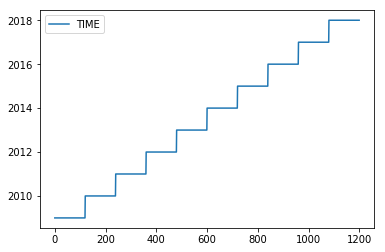

In [0]:
df.plot()

In [0]:
df[41:46]

,TIME,GEO,AGE,UNIT,SEX,Value,Flag and Footnotes
41,2009,Ireland,Total,Percentage of active population,Total,12.6,NaN
42,2009,Greece,Total,Thousand persons,Total,485,NaN
43,2009,Greece,Total,Percentage of total population,Total,5.7,NaN
44,2009,Greece,Total,Percentage of active population,Total,9.6,NaN
45,2009,Spain,Total,Thousand persons,Total,"4,154",NaN


Θα δοκιμάσουμε να υπολογίσουμε το δείκτη ανεργίας, αλλά θα μας βγάλει error!

In [0]:
df.groupby('GEO').Value.mean()  

DataError: No numeric types to aggregate

No numeric types to aggregate ???

Ας δούμε τι τύπος είναι τα δεδομένα που προσπαθούμε να επεξεργαστούμε.


In [0]:
df.dtypes

TIME                   int64
GEO                   object
AGE                   object
UNIT                  object
SEX                   object
Value                 object
Flag and Footnotes    object
dtype: object

In [0]:
df.Value.astype(int)

ValueError: invalid literal for int() with base 10: '19,017'

Ούτε αυτό δουλεύει γιατί όπως βλέπετε δεν υπάρχουν μόνο αριθμοί, αλλά και : στην στήλη αυτή.
    Για να δούμε που είναι αυτό το :

In [0]:
df[df['Value'] == ':']

,TIME,GEO,AGE,UNIT,SEX,Value,Flag and Footnotes
115,2009,United States,Total,Percentage of total population,Total,:,NaN
118,2009,Japan,Total,Percentage of total population,Total,:,NaN
235,2010,United States,Total,Percentage of total population,Total,:,NaN
238,2010,Japan,Total,Percentage of total population,Total,:,NaN
355,2011,United States,Total,Percentage of total population,Total,:,NaN
358,2011,Japan,Total,Percentage of total population,Total,:,NaN
475,2012,United States,Total,Percentage of total population,Total,:,NaN
478,2012,Japan,Total,Percentage of total population,Total,:,NaN
595,2013,United States,Total,Percentage of total population,Total,:,NaN
598,2013,Japan,Total,Percentage of total population,Total,:,NaN


Ας μετατρέψουμε το : σε κάτι που μπορούμε εύκολα να εξαιρέσουμε ή να ξεφορτωθούμε μετά.

In [0]:
# H άγνωστη τιμή στην Python λέγεται np.nan και την λαμβάνουμε από τη βιβλιοθήκη  numpy
# Οπότε κάνουμε replace του χαρακτήρα ':'  με το np.nan
import numpy as np
df['Value'].replace(':', np.nan, inplace=True)

Για να δοκιμασουμε αν μπορούμε να μετατρέψουμε τώρα τη στήλη Value ως δεδκαδικό αριθμό. Πάλι όμως υπάρχει το διαχωριστικό των χιλιάδων ως ',' και αυτό πρέπει να το σβήσουμε...

In [0]:
df.Value.astype(float)

ValueError: could not convert string to float: '19,017'

# Για να δοκιμάσουμε με apply...

In [0]:
def replace(val):
    return(val.replace(',',''))
    

In [0]:
df['Value'] = df.apply(replace, axis=1)

In [0]:
df.dtypes

TIME                   int64
GEO                   object
AGE                   object
UNIT                  object
SEX                   object
Value                 object
Flag and Footnotes    object
dtype: object

In [0]:
df.Value.astype(float)

0       2009.0
1       2009.0
2       2009.0
3       2009.0
4       2009.0
5       2009.0
6       2009.0
7       2009.0
8       2009.0
9       2009.0
10      2009.0
11      2009.0
12      2009.0
13      2009.0
14      2009.0
15      2009.0
16      2009.0
17      2009.0
18      2009.0
19      2009.0
20      2009.0
21      2009.0
22      2009.0
23      2009.0
24      2009.0
25      2009.0
26      2009.0
27      2009.0
28      2009.0
29      2009.0
         ...  
1170    2018.0
1171    2018.0
1172    2018.0
1173    2018.0
1174    2018.0
1175    2018.0
1176    2018.0
1177    2018.0
1178    2018.0
1179    2018.0
1180    2018.0
1181    2018.0
1182    2018.0
1183    2018.0
1184    2018.0
1185    2018.0
1186    2018.0
1187    2018.0
1188    2018.0
1189    2018.0
1190    2018.0
1191    2018.0
1192    2018.0
1193    2018.0
1194    2018.0
1195    2018.0
1196    2018.0
1197    2018.0
1198    2018.0
1199    2018.0
Name: Value, Length: 1200, dtype: float64

## Γραφήματα

Αφού καθαρίσετε σωστά τα δεδομένα σας σύμφωνα με τα παραπάνω, δημιουργήστε (τουλάχιστον) δυο γραφήματα με τη βιβλιοθήκη seaborn.